In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re

In [2]:
df = pd.read_csv("delays.csv")

In [3]:
pd.set_option('display.max_rows',1000)

In [4]:
df.head()

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29,0 min,Warszawa Zachodnia
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34,0 min,Warszawa Zachodnia
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55,0 min,Warszawa Zachodnia


In [5]:
df.describe()

,datetime,id,carrier,date,connection,arrival,delay,name
count,3718170,3718170,3718170,3718170,3718170,3718170,3718170,3718170
unique,4032,7947,10,16,995,1391,358,95
top,2022-05-20 06:15:00,38170/1 USTRONIE,PKP Intercity,2022-05-20,Pruszków - Otwock,07:05,0 min,Żyrardów
freq,1525,17567,1271352,283902,138074,7861,2834968,124841


In [6]:
df['delay'].str.extract('(\d+)').astype('int32')

,0
0,162
1,0
2,0
3,0
4,0
...,...
3718165,4
3718166,0
3718167,0
3718168,6


In [7]:
df['delay'] = df['delay'].str.extract('(\d+)').astype('int32')

In [8]:
df.loc[(df['connection']=='Bohumin - Warszawa Wschodnia')].sort_values('datetime').head(500)

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162,Warszawa Zachodnia
44,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:49,162,Warszawa Wschodnia
72,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:38,163,Warszawa Centralna
253,2022-05-16 00:05:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162,Warszawa Zachodnia
279,2022-05-16 00:05:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:49,162,Warszawa Wschodnia
302,2022-05-16 00:05:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:38,163,Warszawa Centralna
482,2022-05-16 00:10:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162,Warszawa Zachodnia
519,2022-05-16 00:10:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:38,163,Warszawa Centralna
578,2022-05-16 00:10:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:49,162,Warszawa Wschodnia
765,2022-05-16 00:15:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:49,169,Warszawa Wschodnia


In [9]:
df.loc[(df['connection']=='Bohumin - Warszawa Wschodnia')&(df['id']=='41002/3 (102) POLONIA')&(df['date']=='2022-05-20')].sort_values('datetime')

,datetime,id,carrier,date,connection,arrival,delay,name
1306400,2022-05-20 17:15:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,18:07,0,Rybnik
1306421,2022-05-20 17:15:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,19:34,0,Zawiercie
1307778,2022-05-20 17:20:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,18:07,0,Rybnik
1307834,2022-05-20 17:20:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,19:34,0,Zawiercie
1309082,2022-05-20 17:25:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,18:07,0,Rybnik
1309141,2022-05-20 17:25:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,19:34,0,Zawiercie
1310340,2022-05-20 17:30:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,18:07,0,Rybnik
1310386,2022-05-20 17:30:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,19:34,0,Zawiercie
1311755,2022-05-20 17:35:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,18:07,0,Rybnik
1311749,2022-05-20 17:35:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-20,Bohumin - Warszawa Wschodnia,19:34,0,Zawiercie


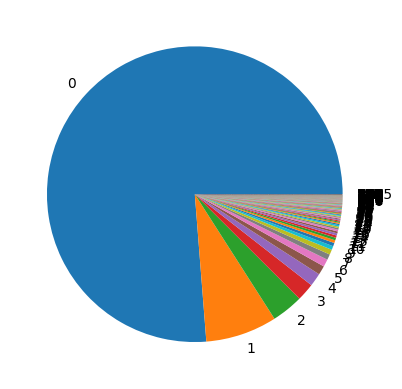

In [10]:

labels = df['delay'].value_counts().index
sizes = df['delay'].value_counts()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

In [11]:
df.loc[df['delay']>=15].size/df.loc[df['delay']<15].size

0.0446219739867869

In [12]:
df.loc[df['delay']<15].size

28474760

In [13]:
df.loc[df['id']=='41002/3 (102) POLONIA'].sort_values('id',ascending=False).head(500)

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162,Warszawa Zachodnia
2627548,2022-05-25 17:55:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,19:34,6,Zawiercie
2631272,2022-05-25 18:15:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,18:50,15,Katowice
2631190,2022-05-25 18:10:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,19:34,6,Zawiercie
2631161,2022-05-25 18:10:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,18:07,14,Rybnik
2630121,2022-05-25 18:10:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,18:50,11,Katowice
2630038,2022-05-25 18:05:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,19:34,6,Zawiercie
2629989,2022-05-25 18:05:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,18:07,14,Rybnik
2628919,2022-05-25 18:05:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,18:50,11,Katowice
2628821,2022-05-25 18:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-25,Bohumin - Warszawa Wschodnia,19:34,6,Zawiercie


In [14]:
df_del = df.loc[df['datetime']=='2022-05-20 00:00:00'].groupby(['name']).mean('name')
df_del.reset_index(inplace=True)
df_del['name']=df_del['name'].str.lower()

In [2]:
import geopandas as gpd
import json 

In [16]:
f = open('gares_pologne_perso.json')
geo_data = json.load(f)
dff=pd.DataFrame(geo_data).T
gdf = gpd.GeoDataFrame(
    dff, geometry=gpd.points_from_xy(dff.loc[:,1], dff.loc[:,0]), crs="EPSG:4326"
)
gdf.head(5)
gdf.drop(columns=[0,1], inplace=True)
f.close()
gdf.head(5)

,geometry
warszawa ochota,POINT (20.98979 52.22555)
warszawa powiśle,POINT (21.02645 52.23331)
warszawa stadion,POINT (21.04447 52.24615)
gdańsk politechnika,POINT (18.62689 54.37449)
gdańsk stocznia,POINT (18.64162 54.36485)


In [17]:
df_00 = gdf.reset_index().merge(df_del,how='right',left_on='index',right_on='name')

In [18]:
df_00.explore(style_kwds={"style_function":lambda x: {"radius":x["properties"]["delay"]}})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


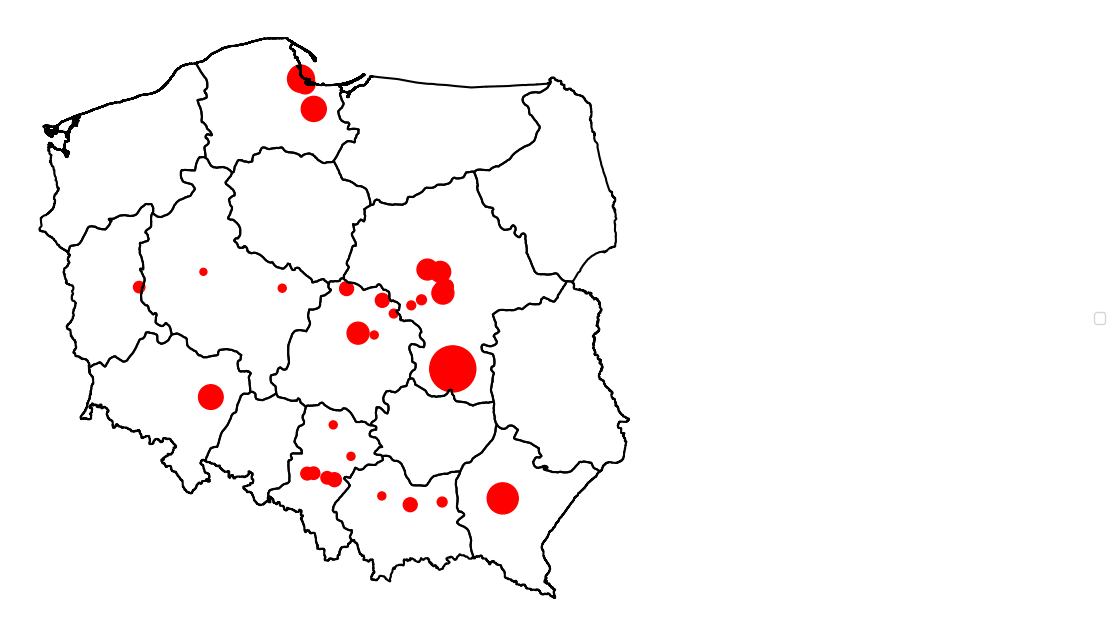

In [19]:

van_geojson = gpd.read_file("C:/Users/paulr/MLUC/poland-with-regions_.geojson")

fig, ax = plt.subplots(figsize = (10,8))

van_geojson.boundary.plot(ax = ax, edgecolor = 'black')

df_00.plot(color='r',ax=ax,markersize=df_00['delay']*100)
# set theft type as scatterplot color
#sns.scatterplot(sample_df['Longitude'], sample_df['Latitude'], marker = 'o', 
 #               hue = df['TYPE'], ax = ax)
                
# move the legend to the right of the plot
ax.legend(loc = 'center right', bbox_to_anchor=(1.7, 0.5), ncol=1) 

ax.axis('off')
plt.show()

In [3]:
import os
import glob

empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty
empty


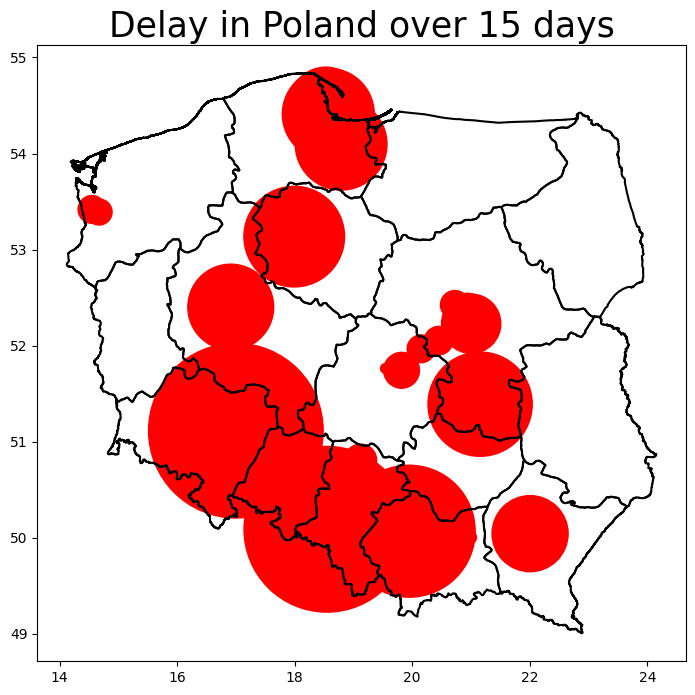

In [91]:
output_path = 'charts/maps'

    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
list_of_days = np.arange(16,22,1)
list_of_minutes = ['0'+str(x) if x<10 else str(x) for x in np.arange(00,65,5)]
list_of_hours = ['0'+str(x) if x<10 else str(x) for x in np.arange(00,24,1)]
for day in list_of_days:
    for hour in list_of_hours:
        for minute in list_of_minutes:

            df_del = df.loc[df['datetime']==f'2022-05-{day} {hour}:{minute}:00'].groupby(['name']).mean('name').reset_index()
           
            
            if df_del.empty:
                print('empty')
            else:
                df_del['name']=df_del['name'].str.lower()
                df_00 = gdf.reset_index().merge(df_del,how='right',left_on='index',right_on='name')

            
            #fig, ax = plt.subplots(figsize = (10,8))
            fig = plt.figure(num=1, clear=True,figsize=(10,8))
            ax = fig.add_subplot()
            
            van_geojson.boundary.plot(ax = ax, edgecolor = 'black')
            
            df_00.plot(color='r',ax=ax,markersize=df_00['delay']*100)
            
            # remove axis of chart
            
            
            # add a title
            ax.set_title('Delay in Poland over 15 days', \
                      fontdict={'fontsize': '25',
                                 'fontweight' : '3'})
            
            # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
            filepath = os.path.join(output_path,f'{day}-{hour}-{minute}_delay.jpg')
            chart = fig.get_figure()
            chart.savefig(filepath, dpi=300)

In [104]:
filenames = [frame for frame in glob.glob("./charts/maps/*.JPG")]
filenames

['./charts/maps\\16-00-00_delay.jpg',
 './charts/maps\\16-00-05_delay.jpg',
 './charts/maps\\16-00-10_delay.jpg',
 './charts/maps\\16-00-15_delay.jpg',
 './charts/maps\\16-00-20_delay.jpg',
 './charts/maps\\16-00-25_delay.jpg',
 './charts/maps\\16-00-30_delay.jpg',
 './charts/maps\\16-00-35_delay.jpg',
 './charts/maps\\16-00-40_delay.jpg',
 './charts/maps\\16-00-45_delay.jpg',
 './charts/maps\\16-00-50_delay.jpg',
 './charts/maps\\16-00-55_delay.jpg',
 './charts/maps\\16-00-60_delay.jpg',
 './charts/maps\\16-01-00_delay.jpg',
 './charts/maps\\16-01-05_delay.jpg',
 './charts/maps\\16-01-10_delay.jpg',
 './charts/maps\\16-01-15_delay.jpg',
 './charts/maps\\16-01-20_delay.jpg',
 './charts/maps\\16-01-25_delay.jpg',
 './charts/maps\\16-01-30_delay.jpg',
 './charts/maps\\16-01-35_delay.jpg',
 './charts/maps\\16-01-40_delay.jpg',
 './charts/maps\\16-01-45_delay.jpg',
 './charts/maps\\16-01-50_delay.jpg',
 './charts/maps\\16-01-55_delay.jpg',
 './charts/maps\\16-01-60_delay.jpg',
 './charts/m

Transforme les .jpg en mp4

In [58]:

import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('./charts/maps/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('test.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [88]:
df.loc[df['datetime']==f'2022-05-{list_of_days[0]} {list_of_hours[0]}:{list_of_minutes[12]}:00'].groupby(['name']).mean('name').reset_index().empty


True

<Axes: >

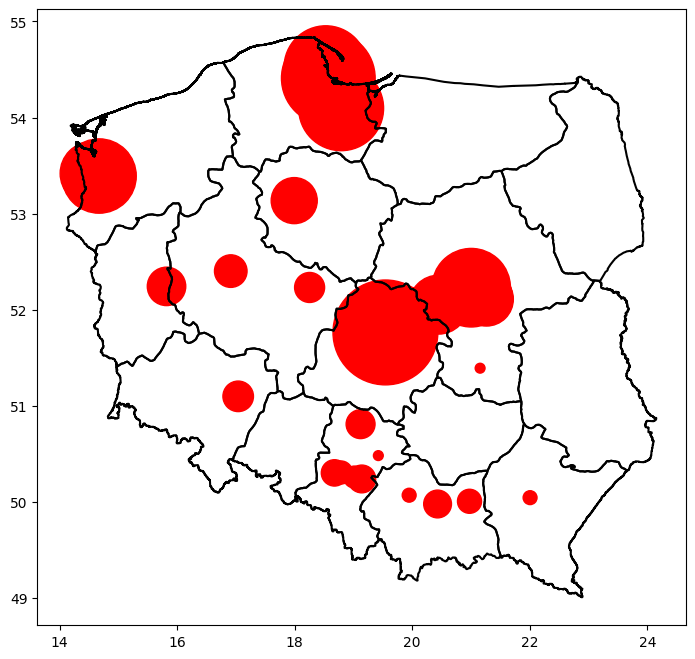

In [75]:
df_del = df.loc[df['datetime']==f'2022-05-{list_of_days[0]} {list_of_hours[0]}:{list_of_minutes[4]}:00'].groupby(['name']).mean('name').reset_index()
           

df_del['name']=df_del['name'].str.lower()
df_00 = gdf.reset_index().merge(df_del,how='right',left_on='index',right_on='name')
fig, ax = plt.subplots(figsize = (10,8))
            
van_geojson.boundary.plot(ax = ax, edgecolor = 'black')
            
df_00.plot(color='r',ax=ax,markersize=df_00['delay']*100)